### Student Information
Name: Noa Moshe

Student ID: x1080014

GitHub ID: noayesa

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

## Data Preparation:


In [1]:
import os     #imported the sentenses 

filenames = ['sentiment_labelled_sentences\\yelp_labelled.txt', 'sentiment_labelled_sentences\\imdb_labelled.txt', 'sentiment_labelled_sentences\\amazon_cells_labelled.txt']
with open('sentiment_labelled_sentences\\labelled.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)
            
            
            
path_to_file = os.path.join("sentiment_labelled_sentences", "labelled.txt")
fd = open(path_to_file , 'r')

data_set = -1

if fd.mode == 'r':
    data_set = fd.read()
    
    
    
print(str(len(data_set)))


204831


C:\Users\Noa\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Data Transformation:

In [2]:
import pandas as pd

clean = data_set.split('\n')   #splitting at \n then splitting at \t so it'll be easier to creat DF

cleaner=[]
for string in clean:
    cleaner.append(string.split('\t'))
    

df = pd.DataFrame(cleaner, columns =['Sentence', 'Label']) 
df 

,Sentence,Label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [3]:
print(sum(df['Label'].isnull()))     #before we remove nulls

if sum(df['Label'].isnull()) > 0:
    df.dropna(inplace=True) 
    
print(sum(df['Label'].isnull()))     #after we remove nulls
    
print(sum(df['Sentence'].duplicated()))  #before we remove duplicates

if sum(df['Sentence'].duplicated()) > 0:
    df.drop_duplicates(keep='first', inplace=True)
    
print(sum(df['Sentence'].duplicated())  ) #after we remove duplicates

1
0
17
0


## Data Preprocessing:

In [4]:
df_sample = df.sample(n=1000) #random state

df_sample

,Sentence,Label
2207,I've had this for nearly 2 years and it has wo...,1
2575,I can barely ever hear on it and am constantly...,0
2240,Big Disappointment with calendar sync.,0
664,Eclectic selection.,1
2960,I exchanged the sony ericson z500a for this an...,1
351,He was terrible!,0
1395,Almost all of the songs in Cover Girl are old-...,0
1692,This is one of Peter Watkins most accessible f...,1
197,I've never been more insulted or felt disrespe...,0
1282,Here's where the movie really pi**ed me off.,0


1    502
0    498
Name: Label, dtype: int64
0    1493
1    1490
Name: Label, dtype: int64


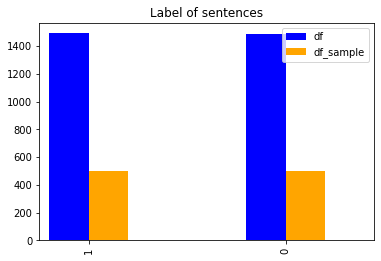

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df_sample.Label.value_counts())
print(df.Label.value_counts())

Y1 = df.Label.value_counts()
Y2 = df_sample.Label.value_counts()

upper_bound = max(max(Y1),max(Y2)) + 10 #finding the max of both data sets to create upper bound

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.2

Y1.plot(kind='bar', color='blue', ax=ax, width=width, position=1, label='df')
Y2.plot(kind='bar', color='orange', ax=ax, width=width, position=0, label='df_sample')

plt.legend(('df', 'df_sample'))

plt.title('Label of sentences')

plt.show()

#We can see there is more negative content than positive.

In [6]:
import nltk
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer

df['token'] = df['Sentence'].apply(lambda x: dmh.tokenize_text(x))

print(df.token[0:1])

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Sentence)

analyze = count_vect.build_analyzer() 
print(analyze(" ".join(list(df[:1].Sentence))))

print(count_vect.get_feature_names()[0:10])

df[1:5]

0    [Wow, ..., Loved, this, place, .]
Name: token, dtype: object
['wow', 'loved', 'this', 'place']
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']


,Sentence,Label,token
1,Crust is not good.,0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."


In [7]:
df_counts[30:40, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [8]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[100:200]]
plot_x

['term_accomodate',
 'term_accompanied',
 'term_according',
 'term_accordingly',
 'term_accountant',
 'term_accurate',
 'term_accurately',
 'term_accused',
 'term_ache',
 'term_achievement',
 'term_achille',
 'term_ackerman',
 'term_acknowledged',
 'term_across',
 'term_act',
 'term_acted',
 'term_acting',
 'term_action',
 'term_actions',
 'term_activate',
 'term_activated',
 'term_activesync',
 'term_actor',
 'term_actors',
 'term_actress',
 'term_actresses',
 'term_actual',
 'term_actually',
 'term_ad',
 'term_adams',
 'term_adaptation',
 'term_adapter',
 'term_adapters',
 'term_add',
 'term_added',
 'term_addition',
 'term_additional',
 'term_address',
 'term_adhesive',
 'term_admins',
 'term_admiration',
 'term_admitted',
 'term_adorable',
 'term_adrift',
 'term_adventure',
 'term_advertised',
 'term_advise',
 'term_aerial',
 'term_aesthetically',
 'term_affected',
 'term_affleck',
 'term_affordable',
 'term_afraid',
 'term_africa',
 'term_after',
 'term_afternoon',
 'term_again',


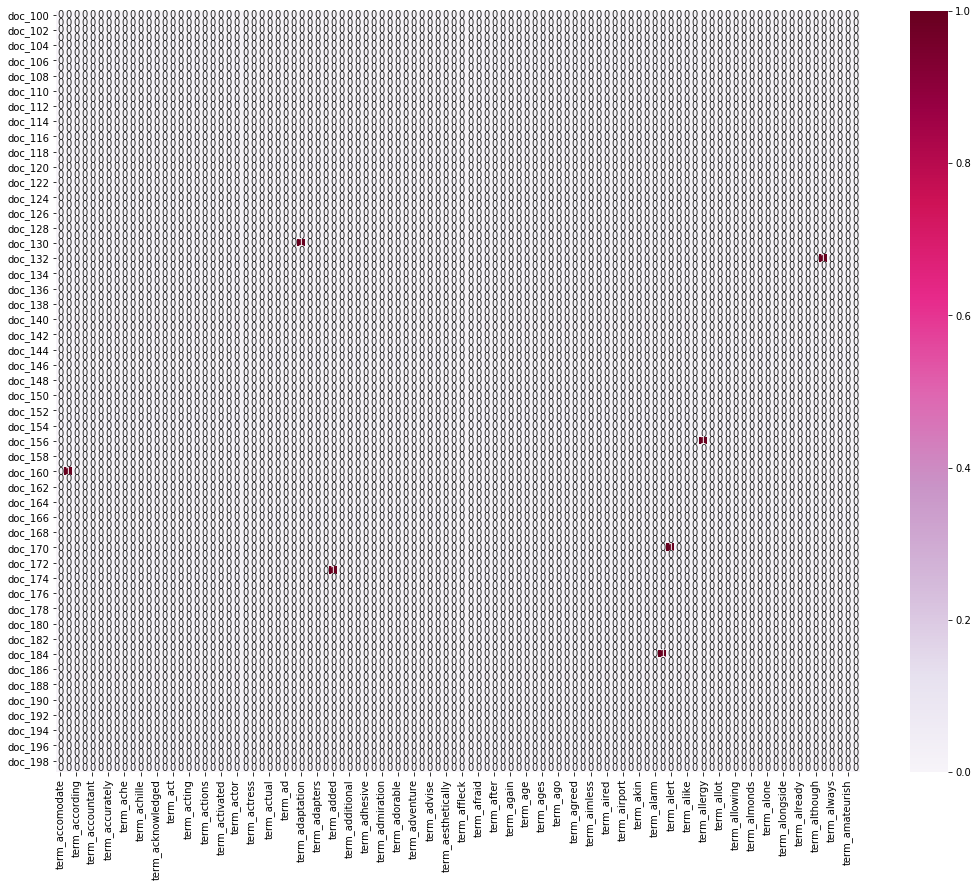

In [9]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[100:200]]
plot_z = df_counts[0:100, 0:100].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [10]:
from sklearn.decomposition import PCA


df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

print(df.shape)
df_reduced.shape

(2983, 3)


(2983, 2)

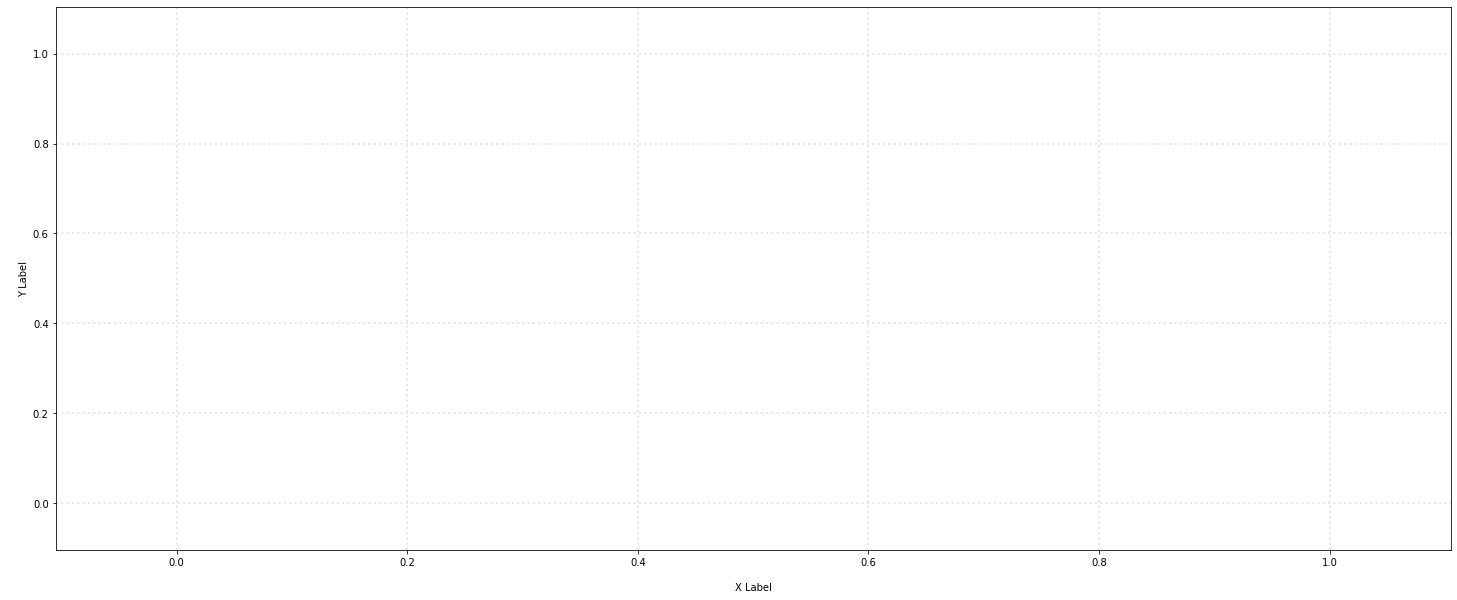

In [11]:
col = ['coral', 'blue', 'black', 'm']

# plot
Labels = [0,1]
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, Labels):
    xs = df_reduced[df['Label'] == label].T[0]
    ys = df_reduced[df['Label'] == label].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [12]:
#frequencies
import numpy as np

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0]

1

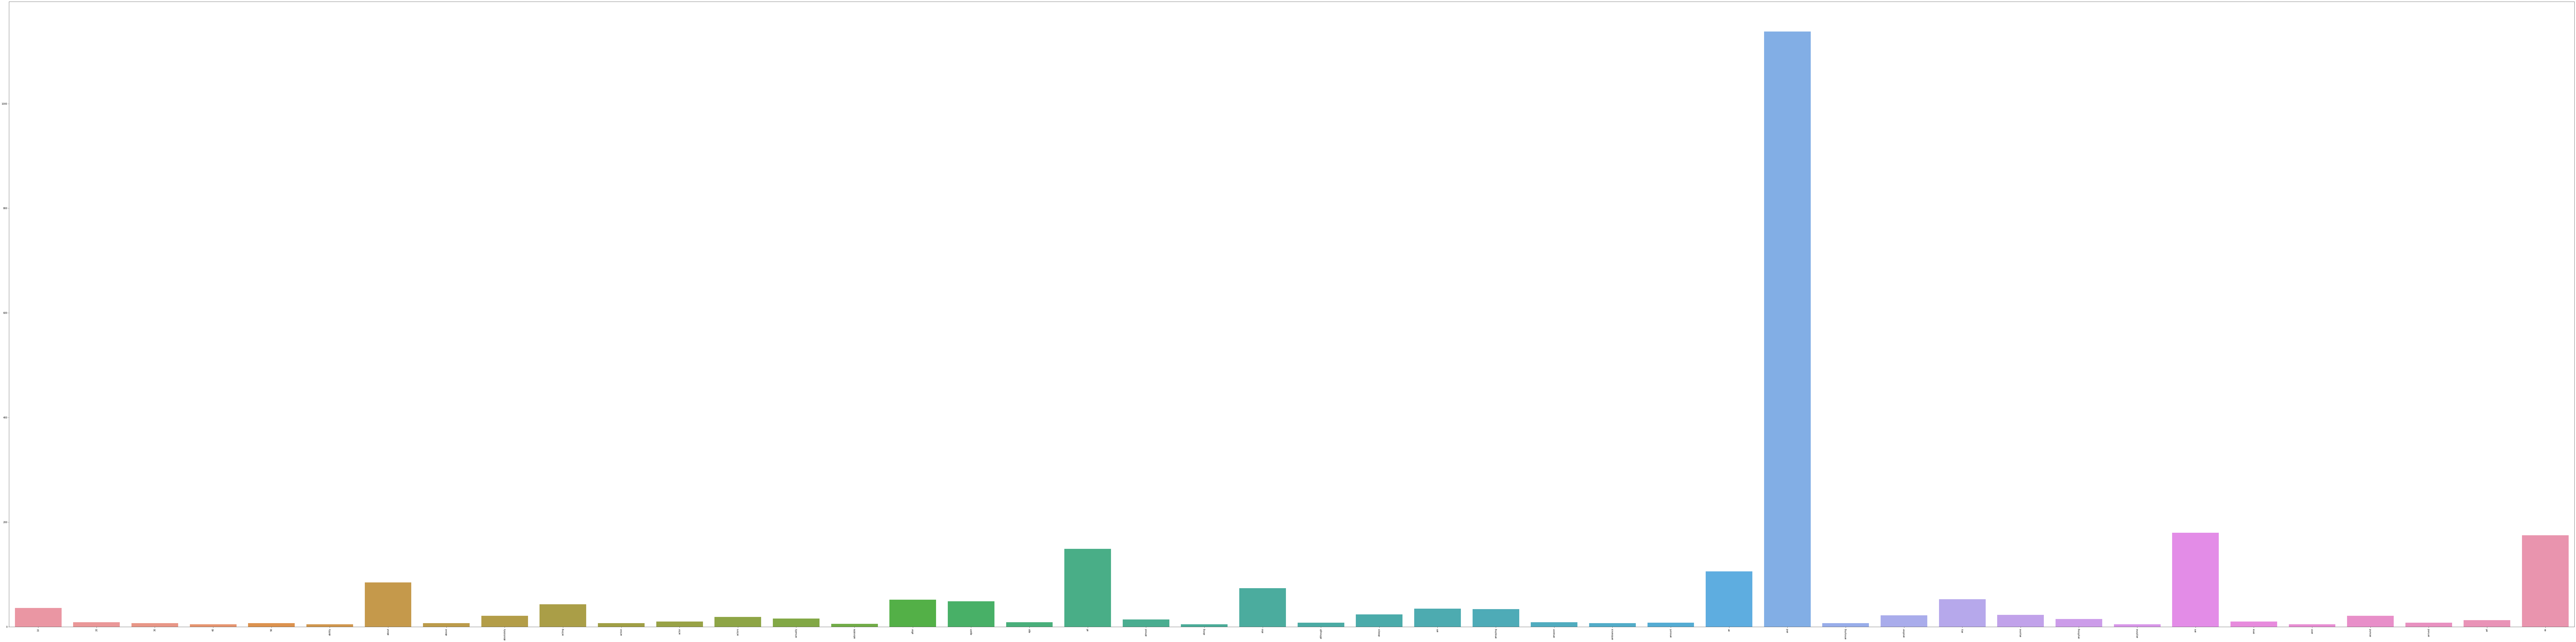

In [13]:
frequencies_of_terms= term_frequencies[:300]
frequencies_of_terms = frequencies_of_terms[(frequencies_of_terms >= 5)] #only looking at words that have frequency >=5

indices = np.array(term_frequencies[:300])
indices = np.where(term_frequencies[:300] >=5) #getting the indices we need to align the words and frequencies

name=[]


for i in range(len(indices[0])):
    name.append(count_vect.get_feature_names()[indices[0][i]]) #creating the new name array with frequencies >=5
    
    
plt.subplots(figsize=(200, 50))
g = sns.barplot(x=name,
            y=frequencies_of_terms)   #plotting
g.set_xticklabels(name, rotation = 90);


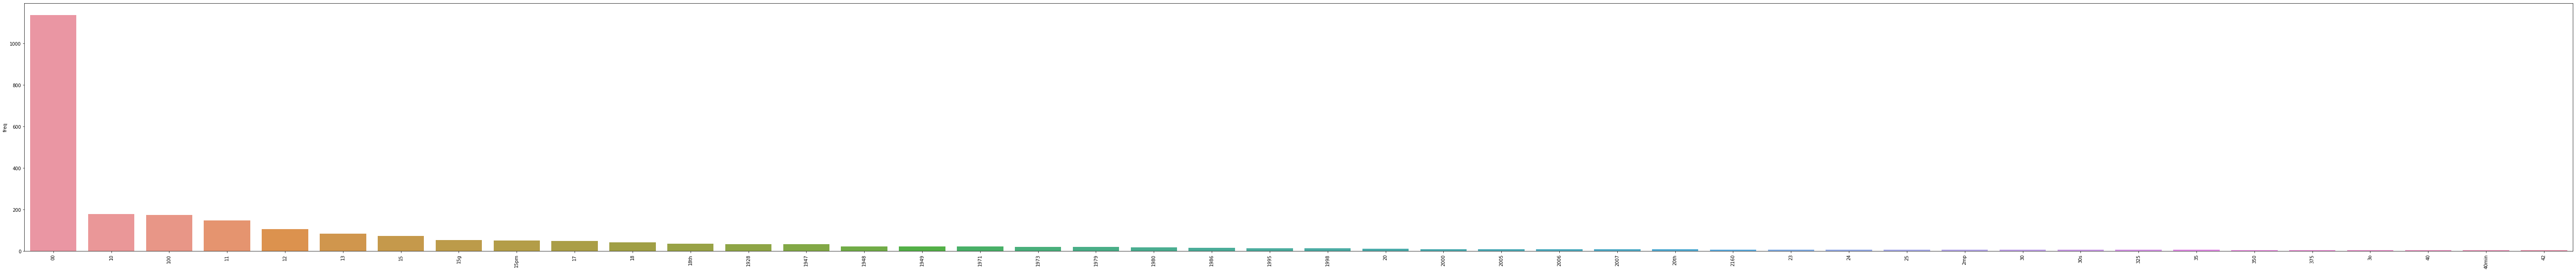

In [21]:
freq =  {'freq':term_frequencies[:300], 'words':count_vect.get_feature_names()[:300]}

freqDF = pd.DataFrame(data=freq)

freqDF.sort_values(by=['freq'], inplace=True, ascending=False) #sorting them



frequencies_of_terms= freqDF.freq[:300]
frequencies_of_terms = frequencies_of_terms[(frequencies_of_terms >= 5)] #only looking at words that have frequency >=5

indices = np.array(freqDF.freq[:300])
indices = np.where(freqDF.freq[:300] >=5) #getting the indices we need to align the words and frequencies

name=[]


for i in range(len(indices[0])):
    name.append(freqDF.words[indices[0][i]]) #creating the new name array with frequencies >=5
    
    
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=name,
            y=frequencies_of_terms)   #plotting
g.set_xticklabels(name, rotation = 90);

## Data Exploration: